<a href="https://colab.research.google.com/github/rajagopalmotivate/hack2023/blob/main/Augment_my_human_cognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://d112y698adiu2z.cloudfront.net/photos/production/challenge_photos/002/339/977/datas/full_width.png'> </src>

# ECL hack 2023


https://devpost.com/software/it-isn-t-how-much-we-take-out-but-how-much-we-can-put-in

# Augment my human cognition

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.7 MB/s eta 0:00:00


In [2]:
import torch
from PIL import Image
from transformers import pipeline
import requests
from io import BytesIO
from IPython.core.display import display, HTML
import math

vqa_pipeline = pipeline("visual-question-answering")


https://raw.githubusercontent.com/rajagopalmotivate/hack2023/main/samples/10.jpg


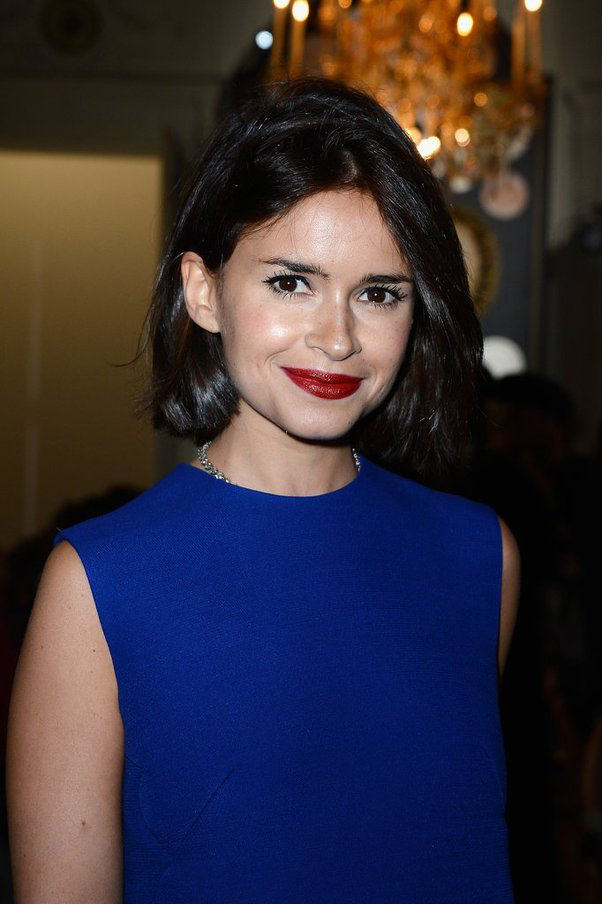

In [26]:
#@title Select a random image (you can specify any image too as a URL). { run: "auto" }

dropdownimageindex = '10' #@param ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
 
url =  "https://raw.githubusercontent.com/rajagopalmotivate/hack2023/main/samples/" + dropdownimageindex + ".jpg"

print(url)
response = requests.get(url)
img = Image.open(BytesIO(response.content))
image.show()



In [71]:
#@title Ask any question about your random photo (You can type a question). { run: "auto" }

question = 'where is her lips?' #@param ["what are people doing here?", "Is her lips and dress are of the different color?", "what the color of her lipstick?", "what is the color of her dress?", "who is taller?", "Where is the person?", "Type your question?"] {allow-input: true}
answerbundle = vqa_pipeline(image, question, top_k=3)
for answer in answerbundle:
  fontsize =  round (answer['score'] * 100.0)
  fontsize = str(fontsize) 
  htmltodisaplay = "<p style=' color: blue; font-size:" +  fontsize +  "px'>" + answer['answer'] + "</p>"
  display(HTML(htmltodisaplay))

# Try this with a bigger AI brain (slower)

In [10]:
from transformers import AutoProcessor, AutoModelForCausalLM
from huggingface_hub import hf_hub_download
from PIL import Image
processor = AutoProcessor.from_pretrained("microsoft/git-large-vqav2")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-large-vqav2")
 

In [ ]:

Use_Bigger_AI_brain_slower = True #@param {type:"boolean"}

pixel_values = processor(images=image, return_tensors="pt").pixel_values


input_ids = processor(text=question, add_special_tokens=False).input_ids
input_ids = [processor.tokenizer.cls_token_id] + input_ids
input_ids = torch.tensor(input_ids).unsqueeze(0)

generated_ids = model.generate(pixel_values=pixel_values, input_ids=input_ids, max_length=50)
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

['what is she doing? smiling']
